<a href="https://colab.research.google.com/github/sizhky/AutoTrain/blob/master/nbs/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
%load_ext autoreload
%autoreload 2
# If running on colab, it will crash the first time
# since install_colab.sh restarts this notebook
try:
    from icevision.all import *
except:
    !pip install -U torch-snippets typer imgaug
    !wget https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
    !bash install_colab.sh

In [2]:
# Setup Data
%load_ext autoreload
%autoreload 2

from torch_snippets import *

# If running locally from AutoTrain/nbs
if not os.path.exists('/content') and P().resolve().stem != 'AutoTrain':
    %cd ..

# If running from colab
if os.path.exists('/content') and not os.path.exists('/content/AutoTrain'):
    !git clone https://github.com/sizhky/AutoTrain

if not P().resolve().stem == 'AutoTrain':
    %cd AutoTrain

import sys; sys.path.append(str(P().resolve()))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/mnt/sda1/code/AutoTrain


In [3]:
!cat configs/object_detection.ini

[project]
owner: sizhky
name: open-images-bus-trucks
location: ${project.name}
model_directory: ${project.location}/models
type: object_detection
num_classes: 2
classes: ["Bus", "Truck"]
data_source_url: https://www.dropbox.com/s/agmzwk95v96ihic/open-images-bus-trucks.tar.xz

[architecture]
model_type: ultralytics.yolov5
backbone: small
pretrained: True
size: 384
[architecture.extra_args]
img_size: ${architecture.size}

[training]
dir: /home/yyr/data/open-images-bus-trucks
images_dir: ${training.dir}/images
annotations_file: ${training.dir}/annotations/mini_open_images_train_coco_format.json
train_ratio: 0.8

[training.preprocess]
@augmentations: get_train_transforms
size: ${architecture.size}
presize: 512

[training.data]
train_dir: ${training.dir}/train
validation_dir: ${training.dir}/validation

[training.scheme]
epochs: 25
freeze_epochs: 5
resume_training_from: ${project.model_directory}/model.pt
output_path: ${project.model_directory}/model.pt

[testing]
[testing.preprocess]
@augm

/home/yyr/miniconda3/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


  0%|          | 0/612 [00:00<?, ?it/s]

  0%|          | 0/409 [00:00<?, ?it/s]

['Epoch, Train-Loss, Validation-Loss, Validation-MAP, Time']
[0, 0.04122010990977287, 0.04988877475261688, 0.7180064232715715, '00:09']
[1, 0.04133296385407448, 0.050154294818639755, 0.712431658405508, '00:06']
[2, 0.04584275186061859, 0.05033993721008301, 0.7233124150109911, '00:06']
[3, 0.04596583545207977, 0.05101049691438675, 0.7052414461549595, '00:06']
[4, 0.04287247359752655, 0.051074232906103134, 0.7192187156732561, '00:06']
[0, 0.0436953641474247, 0.05092588812112808, 0.7183933772135787, '00:07']
[1, 0.03756662458181381, 0.05010344460606575, 0.724198377854578, '00:07']
[2, 0.040562406182289124, 0.05099713057279587, 0.7239393063279155, '00:07']
[3, 0.0386645682156086, 0.050631750375032425, 0.7344393072103137, '00:08']
[4, 0.038149576634168625, 0.05076638609170914, 0.7240391961889732, '00:08']
[5, 0.03728538006544113, 0.051531825214624405, 0.7190484560167344, '00:08']
[6, 0.034201327711343765, 0.05166522040963173, 0.7266807477057021, '00:09']
[7, 0.03511230647563934, 0.052514705

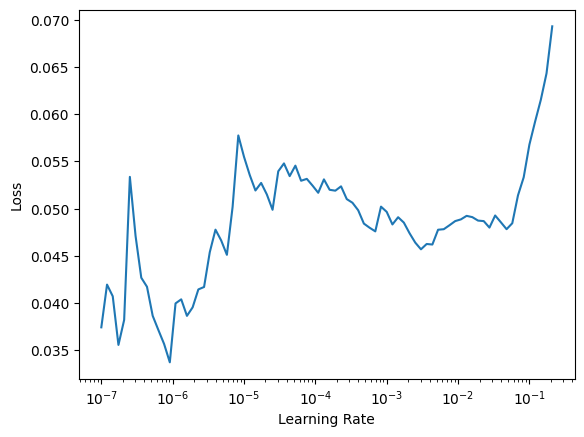

In [4]:
from auto_train.object_detection.train import train_model
import os; os.environ['CONFIG'] = 'configs/object_detection.ini'
train_model()

  0%|          | 0/1 [00:00<?, ?it/s]

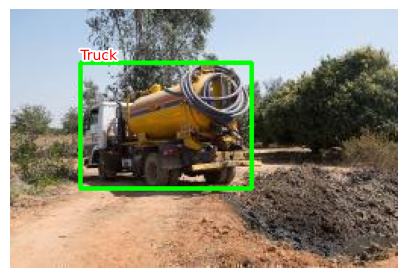

In [12]:
import os; os.environ['CONFIG'] = 'configs/object_detection.ini'
from auto_train.object_detection.infer import infer
fpath = 'test_images/truck.jpg'
output = infer(fpath)
show(fpath, bbs=output['bbs'], texts=output['labels'])